In [15]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

In [17]:
df = df.loc[:,['data','totale_casi']]

In [18]:
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']

In [19]:
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days  )
print(df)

    data  totale_casi
0     54          229
1     55          322
2     56          400
3     57          650
4     58          888
5     59         1128
6     60         1694
7     61         2036
8     62         2502
9     63         3089
10    64         3858
11    65         4636
12    66         5883
13    67         7375
14    68         9172
15    69        10149
16    70        12462
17    71        15113
18    72        17660
19    73        21157
20    74        24747
21    75        27980
22    76        31506
23    77        35713


## LOGISTIC MODEL

In [20]:
# Logistic function that we will use: L(a, x, y, z): z/(1 + e^-((a - y)/x)) 
#a => time 
#x => refers to the infection speed
#y => day of max infections (possible inflection point. dL/dx starts to decrease)
#z => total number of recorded infected people at the end of this infection(number of infected people 
                                                                      #gets closer to z as time t increases)

In [21]:
def L(a,x,y,z):
    return z/(1+np.exp(-(a-y)/x))

<img src = "/Users/shreyash/Downloads/CodeCogsEqn.gif" >

In [22]:
from IPython.display import Image
Image(filename='/Users/shreyash/Downloads/CodeCogsEqn.gif')

In [23]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
print(x)
print(y)

[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[229, 322, 400, 650, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 21157, 24747, 27980, 31506, 35713]


In [24]:
fit = curve_fit(L,x,y,p0=[2,100,20000])
print(fit)
print('covariances diagonal elements')
print('x = ', fit[0][0])
print('y = ', fit[0][1])
print('z = ', fit[0][2])

(array([4.44649421e+00, 7.65193606e+01, 6.74880572e+04]), array([[6.01757239e-03, 2.47540653e-02, 1.93950565e+02],
       [2.47540653e-02, 1.14461533e-01, 9.13985806e+02],
       [1.93950565e+02, 9.13985806e+02, 7.36280220e+06]]))
covariances diagonal elements
x =  4.446494211995874
y =  76.519360588559
z =  67488.05721636489


In [25]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print(errors)
print('[     +/- x,                +/- y,             +/- z       ]')

[0.07757301330152125, 0.3383216415768642, 2713.4483955547853]
[     +/- x,                +/- y,             +/- z       ]


In [26]:
print("The expected number of infected people at infection end is 67488.057 +/- 2713.45.")

The expected number of infected people at infection end is 67488.057 +/- 2713.45.


In [27]:
x1 = 4.446494211995874
y1 = 76.519360588559
z1 = 67488.05721636489
a1 = list(df.iloc[:,0])
infection_end = int(fsolve(lambda a1 : L(a1,x1,y1,z1) - int(z1),y1))

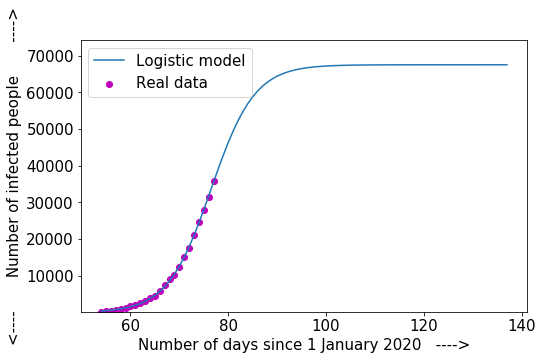

In [29]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
x_param = list(range(max(x),infection_end))
plt.rcParams['figure.figsize'] = [8, 5]
plt.rc('font', size= 15)
plt.scatter(x,y,label = "Real data",color = "m")
# Predicted logistic curve
plt.plot(x + x_param, [L(i,fit[0][0],fit[0][1],fit[0][2]) for i in x + x_param], label="Logistic model" )
plt.legend()
plt.xlabel("Number of days since 1 January 2020   ---->")
plt.ylabel("<----       Number of infected people       ---->")
plt.ylim((min(y)*0.9,z1*1.1))
plt.show()

In [30]:
y_predicted = [L(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]

In [31]:
mean_squared_error(y, y_predicted)

43265.77353002209

## EXPONENTIAL MODEL 

In [32]:
# Exponential function that we will use: f(a, x, y, z): x . e^(y(a - z))
#a => time
#x => refers to the infection speed
#y => day of max infections (possible inflection point. dL/dx starts to decrease)
#z => total number of recorded infected people at the end of this infection(number of infected people 
                                                                      #gets closer to z as time t increases)

In [33]:
def f(a,x,y,z):
    return x*np.exp(y*(a-z))

In [34]:
from IPython.display import Image
Image(filename='/Users/shreyash/Downloads/CodeCogsEqn (1).gif')

In [35]:
exp_fit = curve_fit(f,x,y, p0 = [100, 1, 20])
print(exp_fit)
print('covariances diagonal elements')
print('x = ', exp_fit[0][0])
print('y = ', exp_fit[0][1])
print('z = ', exp_fit[0][2])

(array([4.30566978e+02, 1.61522085e-01, 4.93237916e+01]), array([[6.67942887e+18, 7.61138889e+06, 9.60432241e+16],
       [7.61138571e+06, 2.75708906e-05, 1.09443795e+05],
       [9.60432241e+16, 1.09443842e+05, 1.38100144e+15]]))
covariances diagonal elements
x =  430.5669779496916
y =  0.1615220851218071
z =  49.32379164085626


In [36]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print(errors)
print('[     +/- x,                +/- y,             +/- z       ]')

[0.07757301330152125, 0.3383216415768642, 2713.4483955547853]
[     +/- x,                +/- y,             +/- z       ]


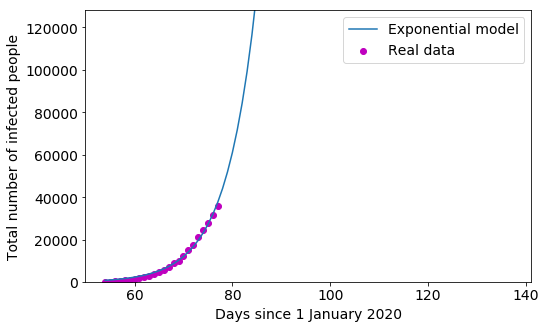

In [40]:
x_param = list(range(max(x),infection_end))
plt.rcParams['figure.figsize'] = [8, 5]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="m")

# Predicted exponential curve
plt.plot(x+x_param, [f(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+x_param], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,z1*1.9))
plt.show()

In [42]:
y_predicted =  [f(i,exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in x]
mean_squared_error(y,y_predicted)

784172.0284428668

 ******
Exponential model has a greater error. 
<br> Thus Logistic model  is a better fit